# Evaluating Regression Lines Lab

### Introduction

In the previous lesson, we learned to evaluate how well a regression line estimated our actual data.  In this lab, we'll turn these formulas into code.  In doing so, we'll build lots of useful functions for both calculating and displaying our errors for a given regression line and dataset.

> In moving through this lab, we'll access to the functions that we previously built out to plot our data, available in the [graph](https://github.com/learn-co-curriculum/evaluating-regression-lines-lab/blob/master/graph.py) here.

### Determining Quality

In the file, `movie_data.py` you will find movie data written as a python list of dictionaries, with each dictionary representing a movie.  The movies are derived from the first 30 entries from the dataset containing 538 movies [provided here](https://raw.githubusercontent.com/fivethirtyeight/data/master/bechdel/movies.csv).

In [2]:
from movie_data import movies 
len(movies)

30

In [3]:
movies

[{'budget': 13000000, 'domgross': 25682380.0, 'title': '21 &amp; Over'},
 {'budget': 45658735, 'domgross': 13414714.0, 'title': 'Dredd 3D'},
 {'budget': 20000000, 'domgross': 53107035.0, 'title': '12 Years a Slave'},
 {'budget': 61000000, 'domgross': 75612460.0, 'title': '2 Guns'},
 {'budget': 40000000, 'domgross': 95020213.0, 'title': '42'},
 {'budget': 225000000, 'domgross': 38362475.0, 'title': '47 Ronin'},
 {'budget': 92000000,
  'domgross': 67349198.0,
  'title': 'A Good Day to Die Hard'},
 {'budget': 12000000, 'domgross': 15323921.0, 'title': 'About Time'},
 {'budget': 130000000, 'domgross': 60522097.0, 'title': 'After Earth'},
 {'budget': 25000000, 'domgross': 37304874.0, 'title': 'August: Osage County'},
 {'budget': 50000000, 'domgross': 19452138.0, 'title': 'Beautiful Creatures'},
 {'budget': 18000000, 'domgross': 33345833.0, 'title': 'Blue Jasmine'},
 {'budget': 55000000, 'domgross': 107136417.0, 'title': 'Captain Phillips'},
 {'budget': 30000000, 'domgross': 35266619.0, 'tit

> Press shift + enter

In [4]:
movies[0]

{'budget': 13000000, 'domgross': 25682380.0, 'title': '21 &amp; Over'}

In [5]:
movies[0]['budget']/1000000

13.0

The numbers are in millions, so we will simplify things by dividing everything by a million

In [6]:
scaled_movies = list(map(lambda movie: {'title': movie['title'], 
                                        'budget': round(movie['budget']/1000000, 0),
                                        'domgross': round(movie['domgross']/1000000,
                                                          0)}, movies))
scaled_movies[0]


{'title': '21 &amp; Over', 'budget': 13.0, 'domgross': 26.0}

Note that, like in previous lessons, the budget is our explanatory value and the revenue is our dependent variable.  Here revenue is represented as the key `domgross`.  

#### Plotting our data

Let's write the code to plot this data set.

As a first task, convert the budget values of our `scaled_movies` to `x_values`, and convert the domgross values of the `scaled_movies` to `y_values`.

In [22]:
x_values =list(map(lambda x :x['budget'],scaled_movies))
y_values = list(map(lambda x :x['domgross'],scaled_movies))

In [8]:
x_values and x_values[0] # 13.0

13.0

In [9]:
y_values and y_values[0] # 26.0

26.0

Assign a variable called `titles` equal to the titles of the movies.

In [10]:
titles = list(map(lambda x :x['title'],scaled_movies))

In [11]:
titles and titles[0]

'21 &amp; Over'

Great! Now we have the data necessary to make a trace of our data.

In [12]:
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)
from graph import trace_values, plot

movies_trace = trace_values(x_values, y_values, text=titles, name='movie data')

plot([movies_trace])

In [15]:
import statsmodels.api as sm
x=sm.add_constant(x_values)
results=sm.OLS(y_values,x).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     11.75
Date:                Sat, 23 Nov 2019   Prob (F-statistic):            0.00190
Time:                        21:06:10   Log-Likelihood:                -177.70
No. Observations:                  30   AIC:                             359.4
Df Residuals:                      28   BIC:                             362.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.1293     28.221      0.855      0.400     -33.679      81.938
x1             1.0299      0.301      3.427      0.002       0.414       1.646
==============================================================================
Omnibus:                       11.109   Durbin-Watson:                   1.612
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.437
Skew:                           0.992   Prob(JB):                      0.00329
Kurtosis:                       5.284   Cond. No.                         155.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
yhat = list(map(lambda x:24.1293+1.0299*x,x_values ))

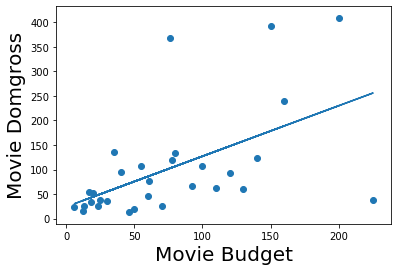

In [23]:


import matplotlib.pyplot as plt

plt.plot(x_values,yhat,'go-', label='Re', linewidth=2)
plt.scatter(x_values,y_values)
plt.xlabel("Movie Budget",fontsize = 20)
plt.ylabel("Movie Domgross",fontsize = 20)
plt.show()


#### Plotting a regression line

Now let's add a regression line to make a prediction of output (revenue) based on an input (the budget).  We'll use the following regression formula:

* $\hat{y} = m x + b$, with $m = 1.7$, and $b = 10$. 


* $\hat{y} = 1.7x + 10$

Write a function called `regression_formula` that calculates our $\hat{y}$ for any provided value of $x$. 

In [11]:
def regression_formula(x):
    y_hat = 1.7*x+10
    return y_hat

Check to see that the regression formula generates the correct outputs.

In [12]:
print(regression_formula(100)) # 180.0
print(regression_formula(250)) # 435.0

180.0
435.0


Let's plot the data as well as the regression line to get a sense of what we are looking at.

In [16]:
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)
from graph import trace_values, m_b_trace, plot

if x_values and y_values:
    movies_trace = trace_values(x_values, y_values, text=titles, name='movie data')
    regression_trace = m_b_trace(1.7, 10, x_values, name='estimated revenue')
    plot([movies_trace, regression_trace])

### Calculating errors of a regression Line

Now that we have our regression formula, we can move towards calculating the error. We provide a function called `y_actual` that given a data set of `x_values` and `y_values`, finds the actual y value, provided a value of `x`.



In [14]:
def y_actual(x, x_values, y_values):
    combined_values = list(zip(x_values, y_values))
    point_at_x = list(filter(lambda point: point[0] == x,combined_values))[0]
    return point_at_x[1]

In [15]:
print(x_values and y_values and y_actual(13, x_values, y_values))# 26.0

26.0


Write a function called `error`, that given a list of `x_values`, and a list of `y_values`, the values `m` and `b` of a regression line, and a value of `x`, returns the error at that x value.  Remember ${\varepsilon_i} =  y_i - \hat{y}_i$.  

In [28]:
def error(x_values, y_values, m, b, x):
    y_hat =m*x+b 
    i=x_values.index(x)
    error = y_values[i]-y_hat
    return error

In [29]:
error(x_values, y_values, 1.7, 10, 13) # -6.099999999999994

-6.099999999999994

Now that we have a formula to calculate our errors, write a function called `error_line_trace` that returns a trace of an error at a given point.  So for a given movie budget, it will display the difference between the regression line and the actual movie revenue.

![](./error-line.png)

Ok, so the function `error_line_trace` takes our dataset of `x_values` as the first argument and `y_values` as the second argument.  It also takes in values of $m$ and $b$ as the next two arguments to represent the regression line we will calculate errors from. Finally, the last argument is the value $x$ it is drawing an error for.

The return value is a dictionary that represents a trace, and looks like the following:

```python
{'marker': {'color': 'red'},
 'mode': 'lines',
 'name': 'error at 120',
 'x': [120, 120],
 'y': [93.0, 214.0]}

```

The trace represents the error line above. The data in `x` and `y` represent the starting point and ending point of the error line. Note that the x value is the same for the starting and ending point, just as it is for each vertical line. It's just the y values that differ - representing the actual value and the expected value. The mode of the trace equals `'lines'`.

In [39]:
def error_line_trace(x_values, y_values, m, b, x):
    y_hat =m*x+b 
    trace = {'marker': {'color': 'red'},
             'mode': 'lines',
             'name': 'error at 120',
             'x': [x, x],
             'y': [y_values[x_values.index(x)], y_hat]}
    return trace

In [40]:
error_at_120m = error_line_trace(x_values, y_values, 1.7, 10, 120)

# {'marker': {'color': 'red'},
#  'mode': 'lines',
#  'name': 'error at 120',
#  'x': [120, 120],
#  'y': [93.0, 214.0]}
error_at_120m

{'marker': {'color': 'red'},
 'mode': 'lines',
 'name': 'error at 120',
 'x': [120, 120],
 'y': [93.0, 214.0]}

We just ran the our function to draw a trace of the error for the movie Elysium.  Let's see how it looks.

In [41]:
scaled_movies[17]

{'title': 'Elysium', 'budget': 120.0, 'domgross': 93.0}

In [42]:
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)
from graph import trace_values, m_b_trace, plot
if x_values and y_values:
    movies_trace = trace_values(x_values, y_values, text=titles, name='movie data')
    regression_trace = m_b_trace(1.7, 10, x_values, name='estimated revenue')
    plot([movies_trace, regression_trace, error_at_120m])

From there, we can write a function called `error_line_traces`, that takes in a list of `x_values` as an argument, `y_values` as an argument, and returns a list of traces for every x value provided.

In [52]:
def error_line_traces(x_values, y_values, m, b):
    error_line_traces=[]
    for x in x_values:
        elt=error_line_trace(x_values, y_values, m, b, x)
        error_line_traces.append(elt)
    return error_line_traces

In [53]:
errors_for_regression = error_line_traces(x_values, y_values, 1.7, 10)

In [55]:
errors_for_regression and len(errors_for_regression) # 30

30

In [56]:
errors_for_regression and errors_for_regression[-1]

# {'x': [200.0, 200.0],
#  'y': [409.0, 350.0],
#  'mode': 'lines',
#  'marker': {'color': 'red'},
#  'name': 'error at 200.0'}

{'marker': {'color': 'red'},
 'mode': 'lines',
 'name': 'error at 120',
 'x': [200.0, 200.0],
 'y': [409.0, 350.0]}

In [57]:
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

from graph import trace_values, m_b_trace, plot

if x_values and y_values:
    movies_trace = trace_values(x_values, y_values, text=titles, name='movie data')
    regression_trace = m_b_trace(1.7, 10, x_values, name='estimated revenue')
    plot([movies_trace, regression_trace, *errors_for_regression])

> Don't worry about some of the points that don't have associated error lines.  It is a complication with Plotly and not our functions.

### Calculating RSS

Now write a function called `squared_error`, that given a value of x, returns the squared error at that x value.

${\varepsilon_i}^2 =  (y_i - \hat{y}_i)^2$

In [62]:
def squared_error(x_values, y_values, m, b, x):
    y_hati = m*x+b
    i=x_values.index(x)
    yi=y_values[i]
    squared_error = (yi-y_hati)**2
    return squared_error

In [63]:
x_values and y_values and squared_error(x_values, y_values, 1.7, 10, x_values[0]) # 37.20999999999993

37.20999999999993

Now write a function that will iterate through the x and y values to create a list of squared errors at each point, $(x_i, y_i)$ of the dataset.

In [66]:
def squared_errors(x_values, y_values, m, b):
    squared_error_list=[]
    for x in x_values:
        sqrd_error=squared_error(x_values, y_values, m, b, x)
        squared_error_list.append(sqrd_error) 
    return squared_error_list
        

In [67]:
x_values and y_values and squared_errors(x_values, y_values, 1.7, 10)

[37.20999999999993,
 5655.040000000001,
 81.0,
 1421.2900000000002,
 289.0,
 125670.25,
 9880.36,
 237.15999999999997,
 28900.0,
 240.25,
 5776.0,
 57.75999999999991,
 12.25,
 676.0,
 510.75999999999976,
 52349.44,
 14.440000000000005,
 14641.0,
 18225.0,
 5184.0,
 10816.0,
 228.01000000000005,
 1849.0,
 16384.0,
 15625.0,
 4356.0,
 144.0,
 580.8100000000001,
 4290.25,
 3481.0]

Next, write a function called `residual_sum_squares` that, provided a list of x_values, y_values, and the m and b values of a regression line, returns the sum of the squared error for the movies in our dataset.

In [68]:
def residual_sum_squares(x_values, y_values, m, b):
     return sum(squared_errors(x_values, y_values, m, b))

In [69]:
residual_sum_squares(x_values, y_values, 1.7, 10) # 327612.2800000001

327612.2800000001

Finally, write a function called `root_mean_squared_error` that calculates the RMSE for the movies in the dataset, provided the same parameters as RSS.  Remember that `root_mean_squared_error` is a way for us to measure the approximate error per data point.

In [70]:
import math
def root_mean_squared_error(x_values, y_values, m, b):
    return math.sqrt(residual_sum_squares(x_values, y_values, m, b)/len(x_values))

In [71]:
root_mean_squared_error(x_values, y_values, 1.7, 10) # 104.50076235766578

104.50076235766578

#### Some functions for your understanding

Now we'll provide a couple functions for you.  Note that we can represent multiple regression lines by a list of m and b values:

In [72]:
regression_lines = [(1.7, 10), (1.9, 20)]

Then we can return a list of the regression lines along with the associated RMSE.

In [73]:
def root_mean_squared_errors(x_values, y_values, regression_lines):
    errors = []
    for regression_line in regression_lines:
        error = root_mean_squared_error(x_values, y_values, regression_line[0], regression_line[1])
        errors.append([regression_line[0], regression_line[1], round(error, 0)])
    return errors

Now let's generate the RMSE values for each of these lines.

In [74]:
x_values and y_values and root_mean_squared_errors(x_values, y_values, regression_lines)

[[1.7, 10, 105.0], [1.9, 20, 120.0]]

Now we'll provide a couple functions for you:
* a function called `trace_rmse`, that builds a bar chart displaying the value of the RMSE.  The return value is a dictionary with keys of `x` and `y`, both which point to lists.  The $x$ key points to a list with one element, a string containing each regression line's m and b value.  The $y$ key points to a list of the RMSE values for each corresponding regression line.

In [75]:
import plotly.graph_objs as go

def trace_rmse(x_values, y_values, regression_lines):
    errors = root_mean_squared_errors(x_values, y_values, regression_lines)
    x_values_bar = list(map(lambda error: 'm: ' + str(error[0]) + ' b: ' + str(error[1]), errors))
    y_values_bar = list(map(lambda error: error[-1], errors))
    return dict(
        x=x_values_bar,
        y=y_values_bar,
        type='bar'
    )


x_values and y_values and trace_rmse(x_values, y_values, regression_lines)

{'x': ['m: 1.7 b: 10', 'm: 1.9 b: 20'], 'y': [105.0, 120.0], 'type': 'bar'}

Once this is built, we can create a subplot showing the two regression lines, as well as the related RMSE for each line.

In [76]:
import plotly
from plotly.offline import iplot
from plotly import tools
import plotly.graph_objs as go

def regression_and_rss(scatter_trace, regression_traces, rss_calc_trace):
    fig = tools.make_subplots(rows=1, cols=2)
    for reg_trace in regression_traces:
        fig.append_trace(reg_trace, 1, 1)
    fig.append_trace(scatter_trace, 1, 1)
    fig.append_trace(rss_calc_trace, 1, 2)
    iplot(fig)

In [77]:
### add more regression lines here, by adding new elements to the list
regression_lines = [(1.7, 10), (1, 50)]

if x_values and y_values:
    regression_traces = list(map(lambda line: m_b_trace(line[0], line[1], x_values, name='m:' + str(line[0]) + 'b: ' + str(line[1])), regression_lines))

    scatter_trace = trace_values(x_values, y_values, text=titles, name='movie data')
    rmse_calc_trace = trace_rmse(x_values, y_values, regression_lines)

    regression_and_rss(scatter_trace, regression_traces, rmse_calc_trace)

/opt/conda/envs/learn-env/lib/python3.6/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



As we can see above, the second line (m: 1.0, b: 50) has the lower RMSE. We thus can conclude that the second line "fits" our set of movie data better than the first line. Ultimately, our goal will be to choose the regression line with the lowest RSME or RSS. We will learn how to accomplish this goal in the following lessons and labs.